# Visualization

In [2]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF

In [3]:
corpus = open("Data/FederalistPapers.txt")
feds = corpus.read()
feds = feds.split("FEDERALIST")
corpse = open("Data/AntiFederalistPapers.txt")
antifeds = corpse.read()
antifeds = antifeds.split("Antifederalist")
both = feds + antifeds

In [4]:
cv_tfidf = TfidfVectorizer(stop_words='english')
X = cv_tfidf.fit_transform(both[1:])
pb = pd.DataFrame(X.toarray(),columns=cv_tfidf.get_feature_names())

In [5]:
from sklearn.metrics import pairwise_distances
from numpy import dot
from numpy.linalg import norm

In [6]:
pairwise_tfidf = pairwise_distances(X, metric = 'cosine')

## Get correct labels on Antifederalist Papers, graph Federalist Paper similarities with Antifederalist writing

In [18]:
# Document label locations
xloc = np.arange(86,166,1)
len(xloc)

80

In [19]:
# Label names
xlabs = pd.read_csv('Data/AntiPLotLab.csv')
xlabs = xlabs['Number']

In [9]:
feds_pair = pairwise_tfidf[0:84]
feds_pair = [fed[86:165] for fed in feds_pair]
feds_pair

[array([0.8847324 , 0.88972047, 0.8440008 , 0.874948  , 0.88773808,
        0.87795594, 0.88574259, 0.90055581, 0.87230225, 0.80554492,
        0.87249354, 0.92113783, 0.88852195, 0.84980179, 0.92604182,
        0.90089877, 0.85371788, 0.83762288, 0.90017776, 0.89400212,
        0.89760376, 0.84869534, 0.83553163, 0.8867903 , 0.88241065,
        0.92084125, 0.87335127, 0.89772709, 0.89663873, 0.86639593,
        0.85997062, 0.89595978, 0.89981403, 0.90170394, 0.81705516,
        0.83755431, 0.90841831, 0.80882068, 0.83258536, 0.85727874,
        0.88722031, 0.83173693, 0.89984531, 0.8562818 , 0.90093644,
        0.86365082, 0.85239659, 0.87742406, 0.86288765, 0.90829871,
        0.90272979, 0.84084861, 0.866716  , 0.84494675, 0.85008429,
        0.91883595, 0.84124509, 0.90672904, 0.89008411, 0.84307193,
        0.88646747, 0.85849668, 0.92720774, 0.89323769, 0.93043811,
        0.92536055, 0.91966444, 0.91196647, 0.91886921, 0.88176128,
        0.89204688, 0.88493158, 0.87757366, 0.86

In [10]:
feds_means = [np.average(fed) for fed in feds_pair]
fedviz = pd.DataFrame(feds_means).reset_index()
fedviz

,index,0
0,0,0.877967
1,1,0.871894
2,2,0.869009
3,3,0.884189
4,4,0.910737
...,...,...
79,79,0.855935
80,80,0.839386
81,81,0.882167
82,82,0.868457


NameError: name 'font2' is not defined

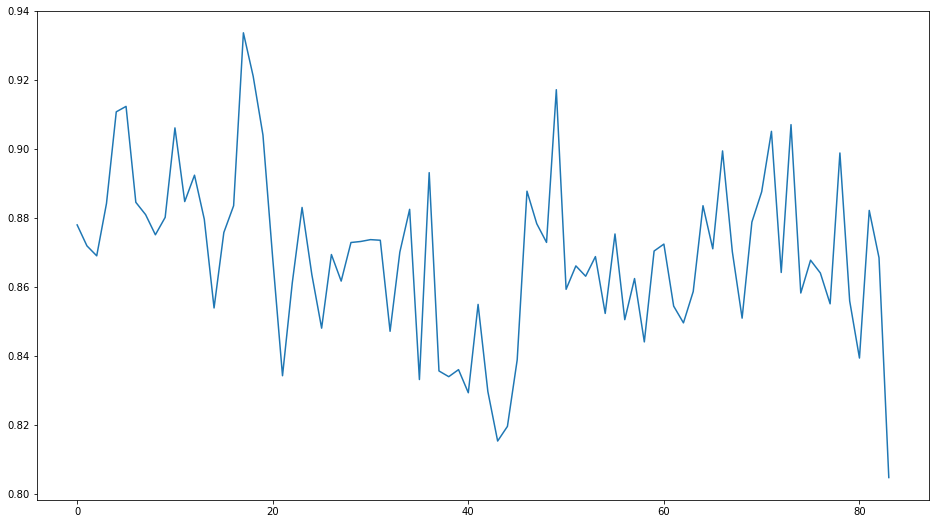

In [11]:
plt.figure(figsize=[16,9])
plt.plot(fedviz['index'],fedviz[0])
plt.xlabel('The Federalist Papers', fontdict=font2)
plt.xticks(ticks=ylabs-1,labels=ylabs);

In [12]:
## Improve the single-quadrant graph from EDA

NameError: name 'xloc' is not defined

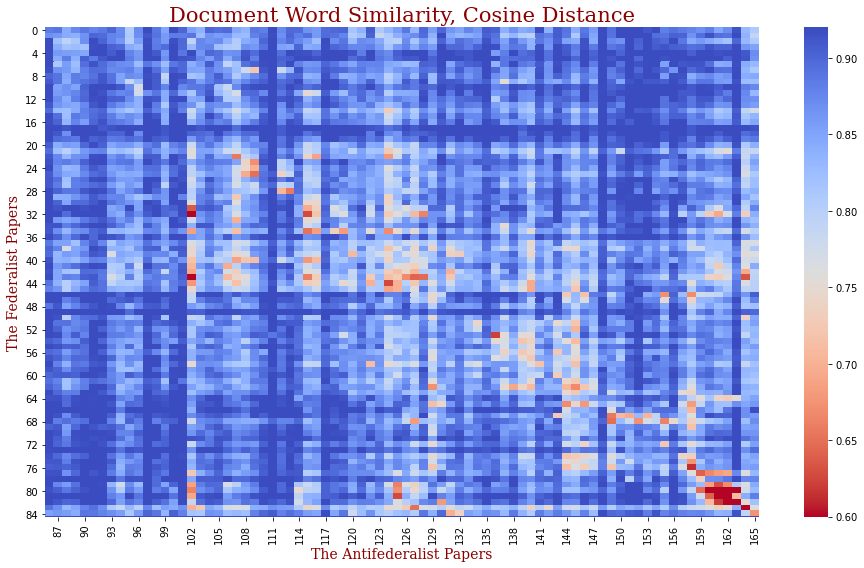

In [13]:
#Take this plot and zoom into the comparison between the two sets. 

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 21,
        }
font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
plt.figure(figsize=[16,9])
sns.heatmap(pairwise_tfidf, cmap="coolwarm_r", vmin=.6, vmax=.92)

plt.title("Document Word Similarity, Cosine Distance", fontdict=font);
plt.xlim(86,166)  
plt.ylim(85,0)
plt.ylabel('The Federalist Papers', fontdict=font2)
plt.xlabel('The Antifederalist Papers', fontdict=font2)
plt.xticks(ticks=xloc,labels=xlabs)
plt.yticks(ticks=ylabs-1,labels=ylabs);


#plt.savefig('ComparisonRdBl2.png')

## NMF and name, label all topics

In [14]:
nmf_both = NMF(8)
feds_topic = nmf_both.fit_transform(X)
feds_topic.shape

(166, 8)

In [15]:
topic_word = nmf_both.components_
topic_word.shape

(8, 10784)

In [16]:
words = cv_tfidf.get_feature_names()
t = nmf_both.components_.argsort(axis=1)[:,-1:-25:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['government',
  'national',
  'union',
  'state',
  'states',
  'people',
  'federal',
  'authority',
  'governments',
  'ought',
  'particular',
  'objects',
  'public',
  'members',
  'citizens',
  'common',
  'extent',
  'local',
  'force',
  'society',
  'principle',
  'different',
  'general',
  'majority'],
 ['executive',
  'president',
  'senate',
  'power',
  'legislative',
  'office',
  'body',
  'magistrate',
  'council',
  'powers',
  'appointment',
  'shall',
  'appointments',
  'legislature',
  'treaties',
  'governor',
  'man',
  'departments',
  'officers',
  'department',
  'constitution',
  'chief',
  'branch',
  'offices'],
 ['courts',
  'court',
  'jury',
  'jurisdiction',
  'cases',
  'supreme',
  'judicial',
  'law',
  'trial',
  'appellate',
  'constitution',
  'state',
  'inferior',
  'judges',
  'causes',
  'states',
  'laws',
  'criminal',
  'judiciary',
  'power',
  'appeal',
  'cognizance',
  'legislature',
  'appeals'],
 ['power',
  'congress',
  'states',

In [17]:
NMF_tops = pd.DataFrame(feds_topic)
NMF_tops[80:90]

,0,1,2,3,4,5,6,7
80,0.033254,0.018614,0.568330,0.000000,0.001179,0.000000,0.000000,0.017865
81,0.026699,0.000000,0.505080,0.000000,0.000000,0.000000,0.000000,0.000000
82,0.037132,0.000000,0.440618,0.000000,0.015459,0.019733,0.020288,0.001556
83,0.082171,0.063770,0.067146,0.136376,0.009403,0.161127,0.000000,0.055720
84,0.149262,0.000000,0.016051,0.000000,0.000000,0.257819,0.011730,0.000000
85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86,0.012487,0.002533,0.000000,0.000000,0.002263,0.243628,0.000000,0.005043
87,0.000000,0.000000,0.000000,0.030829,0.000000,0.126369,0.286635,0.000000
88,0.114318,0.004664,0.000000,0.000000,0.012555,0.134792,0.095578,0.000000
89,0.000000,0.000000,0.000000,0.000000,0.010182,0.210339,0.228176,0.000000


In [18]:
tops_names = ['National_Government', 'Executive', 'Judiciary', 'Congress', 'Military/War', 'Civil Rights', 'Foreign_Affairs', 'Representation']

In [19]:
name_tops = NMF_tops.rename(columns={0:'National_Government', 1:'Executive', 2:'Judiciary', 3:'Congress',
                                     4:'Military/War', 5:'Civil Rights', 6:'Foreign_Affairs', 7:'Representation'},
                                     errors="raise")

In [54]:
name_tops[107:117]

,National_Government,Executive,Judiciary,Congress,Military/War,Civil Rights,Foreign_Affairs,Representation
107,0.088565,0.000000,0.000000,0.299222,0.041817,0.030784,0.061370,0.000000
108,0.000000,0.000000,0.000000,0.099201,0.373118,0.076639,0.000000,0.046438
109,0.000000,0.000000,0.002996,0.028794,0.531901,0.000000,0.000000,0.000000
110,0.000000,0.000000,0.000000,0.113669,0.023897,0.215334,0.000000,0.035008
111,0.000000,0.013141,0.009365,0.013856,0.100936,0.131199,0.000000,0.000000
112,0.000000,0.000000,0.000000,0.000000,0.467793,0.043646,0.000000,0.000000
113,0.000000,0.000000,0.000000,0.000000,0.449030,0.000000,0.000000,0.000000
114,0.000000,0.000000,0.121564,0.233501,0.000000,0.054037,0.035494,0.000799
115,0.014403,0.000000,0.000000,0.517906,0.012494,0.000000,0.000000,0.000000
116,0.062767,0.000000,0.000000,0.416051,0.001350,0.000000,0.000000,0.000000


In [62]:
ind_df.head()

,Essay,Date,Author,Title
0,FEDERALIST No. 1,"October 27, 1787",HAMILTON,General Introduction
1,FEDERALIST No. 2,"October 31, 1787",JAY,Concerning Dangers from Foreign Force and Infl...
2,FEDERALIST No. 3,"November 3, 1787",JAY,The Same Subject Continued (Concerning Dangers...
3,FEDERALIST No. 4,"November 7, 1787",JAY,The Same Subject Continued (Concerning Dangers...
4,FEDERALIST No. 5,"November 10, 1787",JAY,The Same Subject Continued (Concerning Dangers...


In [63]:
name_tops['Essay'] = ind_df['Essay']

In [64]:
name_tops.head()

,National_Government,Executive,Judiciary,Congress,Military/War,Civil Rights,Foreign_Affairs,Representation,Essay
0,0.141159,0.000000,0.009562,0.00000,0.000000,0.193274,0.009991,0.000000,FEDERALIST No. 1
1,0.069557,0.000000,0.000000,0.00000,0.000000,0.257017,0.087213,0.016297,FEDERALIST No. 2
2,0.084177,0.013022,0.067132,0.00000,0.000000,0.018455,0.299203,0.000000,FEDERALIST No. 3
3,0.011346,0.000000,0.000000,0.00158,0.069894,0.000000,0.420328,0.000000,FEDERALIST No. 4
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.468445,0.000000,FEDERALIST No. 5


In [65]:
name_tops[107:117]

,National_Government,Executive,Judiciary,Congress,Military/War,Civil Rights,Foreign_Affairs,Representation,Essay
107,0.088565,0.000000,0.000000,0.299222,0.041817,0.030784,0.061370,0.000000,ANTIFEDERALIST No. 23
108,0.000000,0.000000,0.000000,0.099201,0.373118,0.076639,0.000000,0.046438,ANTIFEDERALIST No. 24
109,0.000000,0.000000,0.002996,0.028794,0.531901,0.000000,0.000000,0.000000,ANTIFEDERALIST No. 25
110,0.000000,0.000000,0.000000,0.113669,0.023897,0.215334,0.000000,0.035008,ANTIFEDERALIST No. 26
111,0.000000,0.013141,0.009365,0.013856,0.100936,0.131199,0.000000,0.000000,ANTIFEDERALIST No. 27
112,0.000000,0.000000,0.000000,0.000000,0.467793,0.043646,0.000000,0.000000,ANTIFEDERALIST No. 28
113,0.000000,0.000000,0.000000,0.000000,0.449030,0.000000,0.000000,0.000000,ANTIFEDERALIST No. 29
114,0.000000,0.000000,0.121564,0.233501,0.000000,0.054037,0.035494,0.000799,ANTIFEDERALIST No. 31
115,0.014403,0.000000,0.000000,0.517906,0.012494,0.000000,0.000000,0.000000,ANTIFEDERALIST No. 32
116,0.062767,0.000000,0.000000,0.416051,0.001350,0.000000,0.000000,0.000000,ANTIFEDERALIST No. 33


# Topic graphs

<ipython-input-34-4628f4495680>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(NMF_tops[0:85], labels=tops_names)


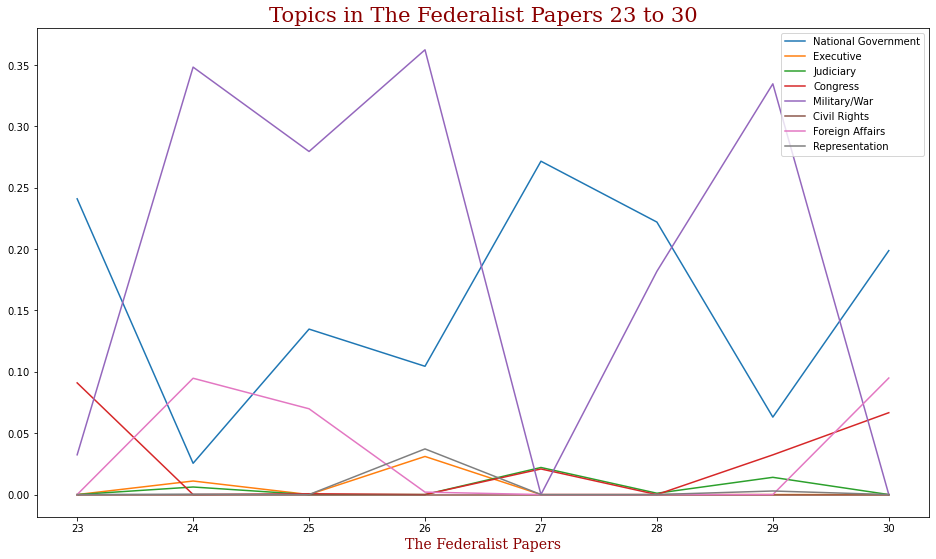

In [34]:
xtk = np.arange(23,31,1)

plt.figure(figsize=[16,9])
plt.plot(NMF_tops[22:30])
plt.title("Topics in The Federalist Papers 23 to 30", fontdict=font);
plt.xlabel('The Federalist Papers', fontdict=font2)
plt.legend(NMF_tops[0:85], labels=tops_names)
plt.xticks(ticks=xtk-1,labels=xtk);

#plt.savefig('Feds23to30.png');

<ipython-input-80-af9985276204>:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(NMF_tops[77:85], labels=tops_names)


AttributeError: 'Text' object has no property 'fontdict'

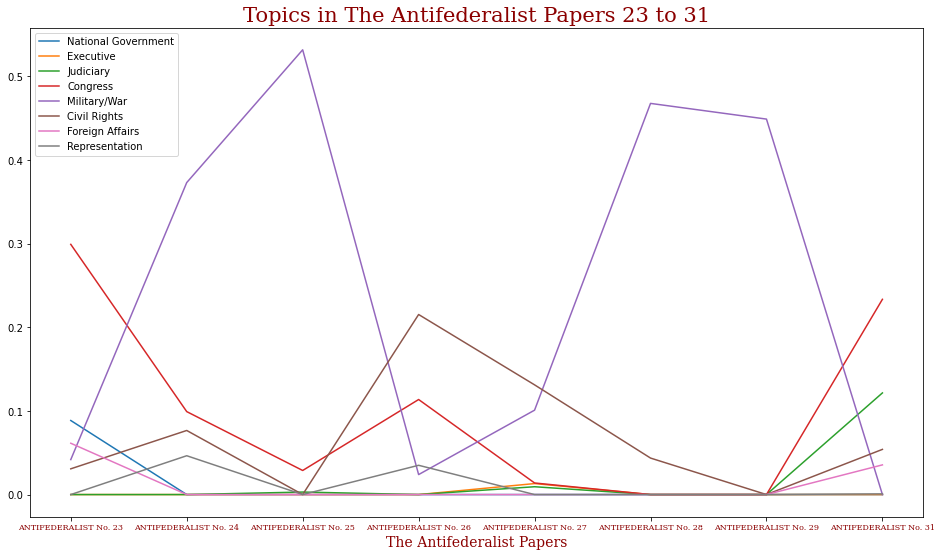

In [80]:
axtk = name_tops['Essay'][107:115]
tktk = np.arange(107,115,1)

font3 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size':8}

plt.figure(figsize=[16,9])
plt.plot(NMF_tops[107:115])
plt.title("Topics in The Antifederalist Papers 23 to 31", fontdict=font)
plt.xlabel('The Antifederalist Papers', fontdict=font2)
plt.legend(NMF_tops[77:85], labels=tops_names)
plt.xticks(ticks=tktk, labels=axtk, fontdict=font3)

#plt.savefig('AntiFeds23to31.png');